In [ ]:
import numpy as np;
import matplotlib.pyplot as plt

## REGRESSION TASK

####**Q1.  Multilinear Regression**
---
---

######**Data Extraction**

In [92]:
data_path_1 = '/content/drive/MyDrive/PRNN assignment 1/Q1 data.txt'

In [93]:
# Load data from 'example4.txt' (assuming it contains string values)
Data = np.genfromtxt(data_path_1, dtype=str, delimiter=",")

# labels of the data
column_labels = Data[0].split("\t")

# Extract data as integers, skipping the first line (column labels)
Data = np.array([[float(x) for x in line.strip().split("\t")] for line in Data[1:]])

split = 0.8
Data_train = Data[:int(split*len(Data)),:]
n_trn , f = Data_train.shape
Data_test = Data[int(split*len(Data)):,:]
n_tst , _ = Data_test.shape

print(column_labels)
print(Data_train.shape)
print(Data_test.shape)

# Normalization
# Calculate mean and standard deviation for each feature
mean_vals = Data.mean(axis=0)
std_vals = Data.std(axis=0)

# Normalize each feature using z-score
data_n = (Data - mean_vals) / std_vals

Data_train_n = data_n[:int(split*len(Data)),:]
Data_test_n = data_n[int(split*len(Data)):,:]
n_trn_n = len(Data_train_n)
n_tst_n = len(Data_test_n)

['feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7', 'feat_8', 'feat_9', 'feat_10', 'Y_1', 'Y_2', 'Y_3']
(11200, 13)
(2800, 13)


######**Solutions:** **I) without bias**

In [94]:
# Train
X_train = Data_train[:, :10]
Y_train = Data_train[:, 10:]
# Test
X_test = Data_test[:, :10]
Y_test = Data_test[:, 10:]

In [95]:
W = np.dot(np.linalg.pinv(X_train.T).T, Y_train)
print(W.T)

[[ 0.77394963  0.53681871 -3.13447676 -1.01368484 -1.05853547  1.89727018
  -0.6667644   0.5937164  -1.2633016  -3.03574711]
 [-0.48094389 -2.01790959 -3.42390664  0.24230557 -4.63502219  1.93236199
  -1.36127315  3.40999454 -0.19168376  2.33387929]
 [ 4.89977472 -0.70633463  0.62035464 -4.61995353  1.36079191 -0.80743011
  -0.63722628 -2.20988201  4.04284123  2.30770034]]


In [96]:
i = 7
print(np.dot(X_train[i], W), Y_train[i])

[-2.03464782 -7.13569914  0.27241897] [-2.47667676 -6.57685262 -0.40541365]


In [97]:
# Loss
loss = 0
for i in range(n_tst):
  loss += np.linalg.norm(np.dot(X_test[i], W)-Y_test[i])**2
MS_loss = (loss/(3*n_tst))
print("Mean Square Error = ", MS_loss)

Mean Square Error =  5.888202925992766


###### **Solution: II) with bias**

In [98]:
# Train data
ones = np.ones((n_trn, 1))
X_train_bias = np.append(Data_train[:, :10], ones, axis=1)
Y_train_bias = Data_train[:, 10:]
# Test data
ones = np.ones((n_tst, 1))
X_test_bias = np.append(Data_test[:, :10], ones, axis=1)
Y_test_bias = Data_test[:, 10:]

In [99]:
W = np.dot(np.linalg.pinv(X_train_bias.T).T, Y_train_bias)
print(W.shape)

(11, 3)


In [100]:
print(W.T)

[[ 0.80158886 -2.17283167 -3.13982253 -0.88851371 -3.77247161  1.82640357
  -0.66204856  0.57642241 -1.27652214 -1.0269229   3.65704343]
 [-0.51046245  0.87598336 -3.41819739  0.10862343 -1.73655208  2.00804716
  -1.36630964  3.42846443 -0.17756429  0.18846516 -3.90570395]
 [ 4.89037314  0.21536193  0.62217302 -4.66253091  2.28394628 -0.7833246
  -0.63883039 -2.2039994   4.04733824  1.62439213 -1.24395545]]


###### **Evaluation:**

1. Pearson Correlation

Pearson correlation coefficient: 
0.9448285876119292


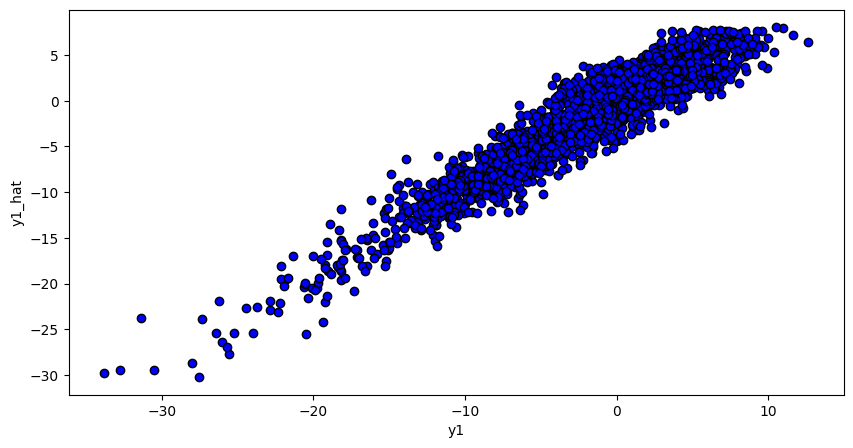

Pearson correlation coefficient: 
0.9635185121843558


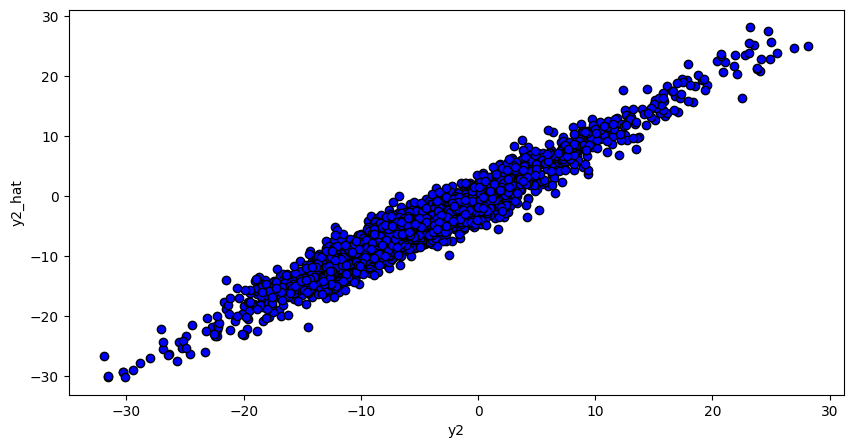

Pearson correlation coefficient: 
0.981180427459984


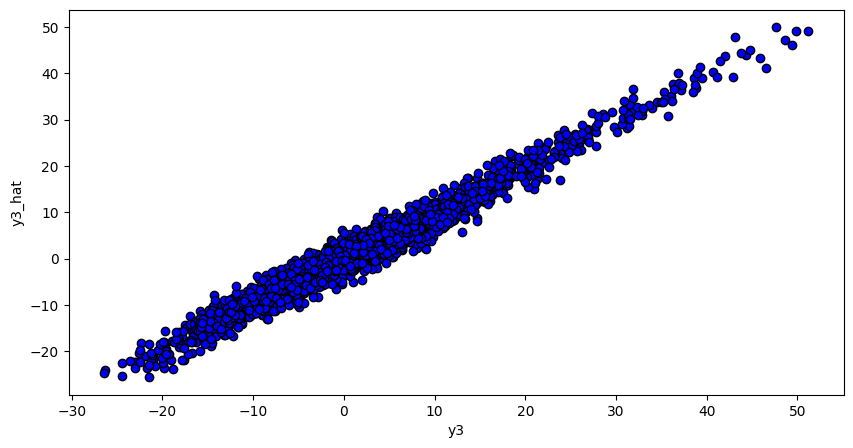

In [101]:
Y1_hat = np.dot(X_test_bias, W.T[0])
Y1 = Y_test_bias[:,0]
Y2_hat = np.dot(X_test_bias, W.T[1])
Y2 = Y_test_bias[:,1]
Y3_hat = np.dot(X_test_bias, W.T[2])
Y3 = Y_test_bias[:,2]

correlation_coefficient = np.corrcoef(Y1_hat, Y1)
print(f"Pearson correlation coefficient: ")
print(correlation_coefficient[0,1])
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.scatter(Y1, Y1_hat, c='blue', marker='o', label='Data Points', edgecolors=[0,0,0])
plt.xlabel("y1")
plt.ylabel("y1_hat")
plt.show()

correlation_coefficient = np.corrcoef(Y2_hat, Y2)
print(f"Pearson correlation coefficient: ")
print(correlation_coefficient[0,1])
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.scatter(Y2, Y2_hat, c='blue', marker='o', label='Data Points', edgecolors=[0,0,0])
plt.xlabel("y2")
plt.ylabel("y2_hat")
plt.show()

correlation_coefficient = np.corrcoef(Y3_hat, Y3)
print(f"Pearson correlation coefficient: ")
print(correlation_coefficient[0,1])
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.scatter(Y3, Y3_hat, c='blue', marker='o', label='Data Points', edgecolors=[0,0,0]           )
plt.xlabel("y3")
plt.ylabel("y3_hat")

plt.show()

2.  Mean Squared Error

In [102]:
loss = 0
for i in range(n_tst):
  loss += np.linalg.norm(np.dot(X_test_bias[i], W)-Y_test_bias[i])**2
MS_loss = (loss/(3*n_tst))
print("Mean Square Error = ", MS_loss)

Mean Square Error =  4.1067275942927814


3. Mean Absolute Error

In [103]:
loss = 0
for i in range(n_tst):
  loss += np.sum(np.abs(np.dot(X_test_bias[i], W)-Y_test_bias[i]))
MA_loss = (loss/(3*n_tst))
print("Mean Absolute Error = ", MA_loss)

Mean Absolute Error =  1.6105791899727164


Therefore including ***bias term reduces loss***

**Note :** **bias weights will be zero if we perform normalization.**

In [104]:
# Train
ones = np.ones((n_trn, 1))
X_train_n = np.append(Data_train_n[:, :10], ones, axis=1)
Y_train_n = Data_train_n[:, 10:]
# Test
ones = np.ones((n_tst, 1))
X_test_n = np.append(Data_test_n[:, :10], ones, axis=1)
Y_test_n = Data_test_n[:, 10:]

In [105]:
W = np.dot(np.linalg.pinv(X_train_n.T).T, Y_train_n)
print("bias term weights :- ",W.T[:,10])
print("weights for features :- ")
print(W.T[:,:10])

bias term weights :-  [ 1.43065385e-05  4.85549215e-04 -5.16363353e-04]
weights for features :- 
[[ 0.11163538 -0.23407196 -0.64520728 -0.12332259 -0.40546072  0.37345751
  -0.07997037  0.08115907 -0.17927001 -0.13986575]
 [-0.05824082  0.07730947 -0.57544631  0.01235138 -0.15290586  0.33638131
  -0.13520786  0.39546621 -0.02042906  0.02102898]
 [ 0.39265644  0.01337559  0.07370991 -0.37309617  0.14152372 -0.09234359
  -0.04448826 -0.17890738  0.32769465  0.12755133]]


In [106]:
# Loss
loss = 0
for i in range(n_tst):
  loss += np.linalg.norm(np.dot(X_test_n[i], W)-Y_test_n[i])**2
RMS_loss = np.sqrt(loss/n_tst)
print("RMS loss = ", RMS_loss)

RMS loss =  0.45832185743412657


Here the loss reduced ***due to the normalization*** of data point by a factor.

####**Q2.  Generalised Regression with polynomial kernel**
---
---

######**Data Extraction**

In [71]:
data_path_2 = '/content/drive/MyDrive/PRNN assignment 1/Copy of regression_data_multiGen_group_25_train.txt'

In [72]:
# Load data from 'example4.txt' (assuming it contains string values)
Data_2 = np.genfromtxt(data_path_2, dtype=str, delimiter=",")

# labels of the data
column_labels = (Data_2[0]).split("\t")

# Extract data as integers, skipping the first line (column labels)
Data_2 = np.array([[float(x) for x in line.strip().split("\t")] for line in Data_2[1:]])

split = 0.8
Data_train = Data_2[:int(split*len(Data_2)),:]
n_trn , f_2 = Data_train.shape
Data_test = Data_2[int(split*len(Data_2)):,:]
n_tst , _ = Data_test.shape

print(column_labels)
print(Data_train.shape)
print(Data_test.shape)

# Normalization
# Calculate mean and standard deviation for each feature
mean_vals = Data_2.mean(axis=0)
std_vals = Data_2.std(axis=0)

# Normalize each feature using z-score
data_n = (Data_2 - mean_vals) / std_vals

Data_train_n = data_n[:int(split*len(Data_2)),:]
Data_test_n = data_n[int(split*len(Data_2)):,:]
n_trn_n = len(Data_train_n)
n_tst_n = len(Data_test_n)

['feat_1', 'feat_2', 'Y_1', 'Y_2', 'Y_3']
(11200, 5)
(2800, 5)


In [73]:
X_train = Data_train[:, :2]
Y_train = Data_train[:, 2:]
# quadratic terms
X_train = np.append(X_train, (X_train[:,0]**2).reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, (X_train[:,1]**2).reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, (X_train[:,0]*X_train[:,1]).reshape(n_trn, 1), axis=1)
# cubic terms
X_train = np.append(X_train, (X_train[:,0]**3).reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, (X_train[:,1]**3).reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, ((X_train[:,0]**2)*X_train[:,1]).reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, ((X_train[:,1]**2)*X_train[:,0]).reshape(n_trn, 1), axis=1)
# Bi-quadratic terms
# X_train = np.append(X_train, (X_train[:,0]**4).reshape(n_trn, 1), axis=1)
# X_train = np.append(X_train, (X_train[:,1]**4).reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, ((X_train[:,0]**2)*(X_train[:,1]**2)).reshape(n_trn, 1), axis=1)
# X_train = np.append(X_train, ((X_train[:,0]**3)*X_train[:,1]).reshape(n_trn, 1), axis=1)
# X_train = np.append(X_train, (X_train[:,0]*(X_train[:,1]**3)).reshape(n_trn, 1), axis=1)
ones = np.ones((n_trn, 1))
X_train = np.append(X_train, ones, axis=1)
print("train data dimensin = ", X_train.shape)
X_test = Data_test[:, :2]
Y_test = Data_test[:, 2:]
# quadratic terms
X_test = np.append(X_test, (X_test[:,0]**2).reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, (X_test[:,1]**2).reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, (X_test[:,0]*X_test[:,1]).reshape(n_tst, 1), axis=1)
# cubic terms
X_test = np.append(X_test, (X_test[:,0]**3).reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, (X_test[:,1]**3).reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, ((X_test[:,0]**2)*X_test[:,1]).reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, ((X_test[:,1]**2)*X_test[:,0]).reshape(n_tst, 1), axis=1)
# Bi-quadratic terms
# X_test = np.append(X_test, (X_test[:,0]**4).reshape(n_tst, 1), axis=1)
# X_test = np.append(X_test, (X_test[:,1]**4).reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, ((X_test[:,0]**2)*(X_test[:,1]**2)).reshape(n_tst, 1), axis=1)
# X_test = np.append(X_test, ((X_test[:,0]**3)*X_test[:,1]).reshape(n_tst, 1), axis=1)
# X_test = np.append(X_test, (X_test[:,0]*(X_test[:,1]**3)).reshape(n_tst, 1), axis=1)
ones = np.ones((n_tst, 1))
X_test = np.append(X_test, ones, axis=1)
print("test data dimensin = ", X_test.shape)

train data dimensin =  (11200, 11)
test data dimensin =  (2800, 11)


###### **Solution**

In [74]:
W = np.dot(np.linalg.pinv(X_train.T).T, Y_train)

In [75]:
print("bias term weights :- ",W.T[:,-1])
print("weights for features :- ")
print(W.T[:,:-1])

bias term weights :-  [ 3.65704343 -3.90570395 -1.24395545]
weights for features :- 
[[ 0.80158886 -0.88851371 -2.17283167 -3.77247161 -0.66204856 -3.13982253
   1.82640357  0.57642241 -1.27652214 -1.0269229 ]
 [-0.51046245  0.10862343  0.87598336 -1.73655208 -1.36630964 -3.41819739
   2.00804716  3.42846443 -0.17756429  0.18846516]
 [ 4.89037314 -4.66253091  0.21536193  2.28394628 -0.63883039  0.62217302
  -0.7833246  -2.2039994   4.04733824  1.62439213]]


######**Evaluation**

Pearson correlation coefficient for y1: 
0.9448285876119296


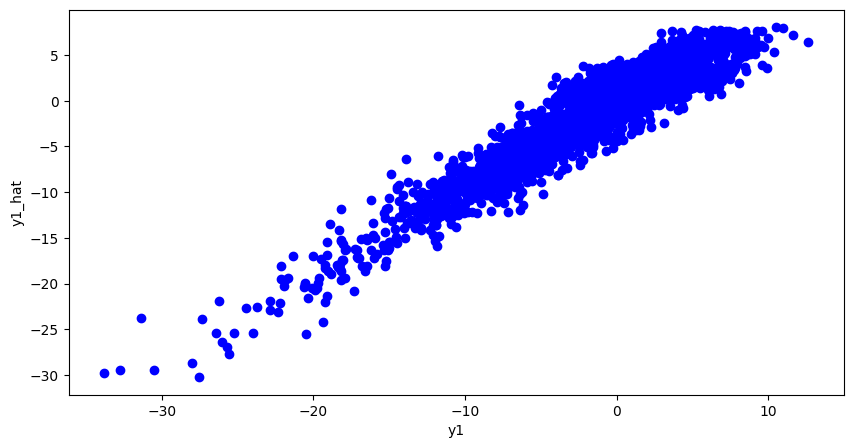

Pearson correlation coefficient for y2: 
0.9635185121843559


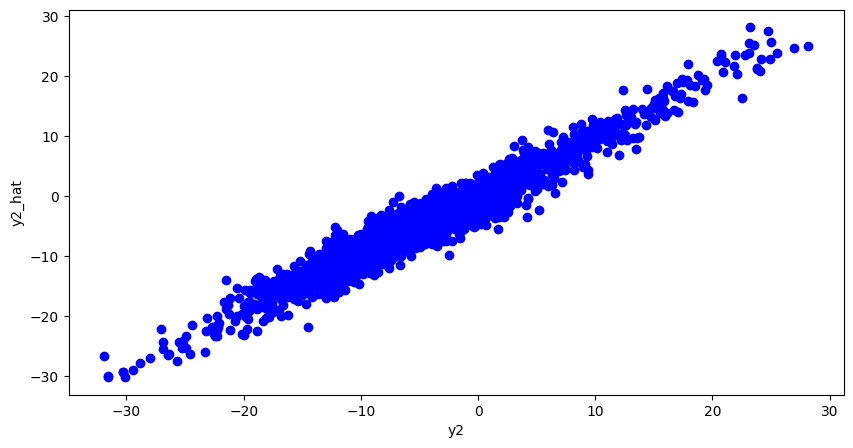

Pearson correlation coefficient for y3: 
0.981180427459984


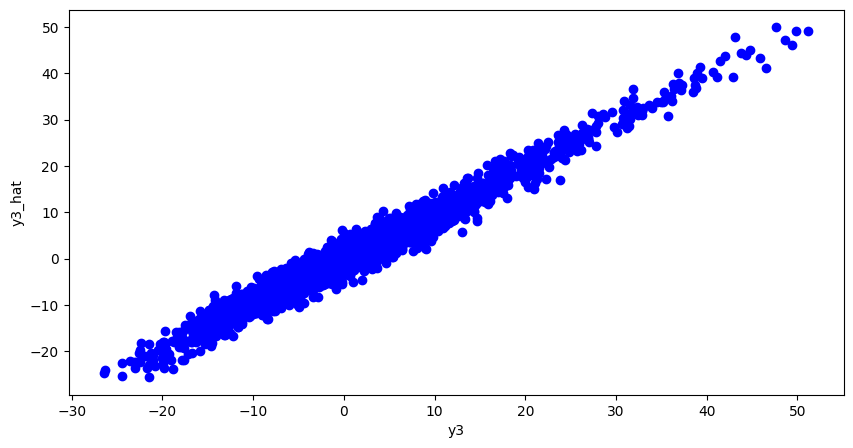

In [76]:
Y1_hat = np.dot(X_test, W.T[0])
Y1 = Y_test[:,0]
Y2_hat = np.dot(X_test, W.T[1])
Y2 = Y_test[:,1]
Y3_hat = np.dot(X_test, W.T[2])
Y3 = Y_test[:,2]

correlation_coefficient = np.corrcoef(Y1_hat, Y1)
print(f"Pearson correlation coefficient for y1: ")
print(correlation_coefficient[0,1])
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.scatter(Y1, Y1_hat, c='blue', marker='o', label='Data Points', edgecolors=[0,0,0])
plt.xlabel("y1")
plt.ylabel("y1_hat")
plt.show()

correlation_coefficient = np.corrcoef(Y2_hat, Y2)
print(f"Pearson correlation coefficient for y2: ")
print(correlation_coefficient[0,1])
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.scatter(Y2, Y2_hat, c='blue', marker='o', label='Data Points', edgecolors=[0,0,0])
plt.xlabel("y2")
plt.ylabel("y2_hat")
plt.show()

correlation_coefficient = np.corrcoef(Y3_hat, Y3)
print(f"Pearson correlation coefficient for y3: ")
print(correlation_coefficient[0,1])
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.scatter(Y3, Y3_hat, c='blue', marker='o', label='Data Points', edgecolors=[0,0,0])
plt.xlabel("y3")
plt.ylabel("y3_hat")

plt.show()

In [77]:
loss = 0
for i in range(n_tst):
  loss += np.linalg.norm(np.dot(X_test[i], W)-Y_test[i])**2
MS_loss = (loss/(3*n_tst))
print("Root Mean Square Error = ", MS_loss)

Root Mean Square Error =  4.1067275942927814


loss without polynomial terms = 7.3510648225910105

loss with all quadratic terms = 5.618834132031067

loss with all cubic terms = 6.009893296263616

loss with all quadratic and cubic terms = 3.647347606543249

loss with all quadratic, cubic & biquadratic terms = 3.5113517890265444

loss with quadratic ( all terms ), cubic terms ( all terms ) & biquadratic ( only ($x_{1}^{2}*x_{2}^{2}$) term ) ( only reducing lower weighted terms ) = 3.510011792413003

####**Q3 Generalised Regression with non-polynomial kernel**
---
---

######**Data Extraction**

In [84]:
data_path_3 = '/content/drive/MyDrive/PRNN assignment 1/Copy of regression_data_uni_group_25_train.txt'

In [85]:
def sigmoid(t):
  val = 1 + np.exp(-t);
  return 1/val;

In [86]:
# Load data from 'example4.txt' (assuming it contains string values)
Data_3 = np.genfromtxt(data_path_3, dtype=str, delimiter=",")

# labels of the data
column_labels = (Data_3[0]).split("\t")

# Extract data as integers, skipping the first line (column labels)
Data_3 = np.array([[float(x) for x in line.strip().split("\t")] for line in Data_3[1:]])

split = 0.9
Data_train = Data_3[:int(split*len(Data_3)),:]
n_trn , f_2 = Data_train.shape
Data_test = Data_3[int(split*len(Data_3)):,:]
n_tst , _ = Data_test.shape

print(column_labels)
print(Data_train.shape)
print(Data_test.shape)

# Normalization
# Calculate mean and standard deviation for each feature
mean_vals = Data_3.mean(axis=0)
std_vals = Data_3.std(axis=0)

# Normalize each feature using z-score
data_n = (Data_3 - mean_vals) / std_vals

Data_train_n = data_n[:int(split*len(Data_3)),:]
Data_test_n = data_n[int(split*len(Data_3)):,:]
n_trn_n = len(Data_train_n)
n_tst_n = len(Data_test_n)

['feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'y']
(6300, 6)
(700, 6)


In [87]:
# exp(1,2), sin(1,2,5), cos(0)

# Train data
# implimenting sigmoid by inverting y
Y_train = np.log(Data_train[:, 5]) - np.log(1 - Data_train[:, 5])
X_train = np.ones((n_trn, 1))

# linear
X_train = np.append(X_train, Data_train[:, 0].reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, Data_train[:, 1].reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, Data_train[:, 2].reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, Data_train[:, 3].reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, Data_train[:, 4].reshape(n_trn, 1), axis=1)
# Sinosoidal terms
X_train = np.append(X_train, np.tanh(Data_train[:,0]).reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, np.tanh(Data_train[:,1]).reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, np.tanh(Data_train[:,2]).reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, np.tanh(Data_train[:,3]).reshape(n_trn, 1), axis=1)
X_train = np.append(X_train, np.tanh(Data_train[:,4]).reshape(n_trn, 1), axis=1)
# X_train = np.append(X_train, np.cos(Data_train[:,0]).reshape(n_trn, 1), axis=1)
# X_train = np.append(X_train, np.cos(Data_train[:,1]).reshape(n_trn, 1), axis=1)
# X_train = np.append(X_train, np.cos(Data_train[:,2]).reshape(n_trn, 1), axis=1)
# X_train = np.append(X_train, np.cos(Data_train[:,3]).reshape(n_trn, 1), axis=1)
# X_train = np.append(X_train, np.cos(Data_train[:,4]).reshape(n_trn, 1), axis=1)
# bias
# X_train = np.append(X_train, np.ones((n_trn, 1)), axis=1)

###############################################################################

# Test data
Y_test = np.log(Data_test[:, 5]) - np.log(1 - Data_test[:, 5])
X_test = np.ones((n_tst, 1))

# linear
X_test = np.append(X_test, Data_test[:, 0].reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, Data_test[:, 1].reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, Data_test[:, 2].reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, Data_test[:, 3].reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, Data_test[:, 4].reshape(n_tst, 1), axis=1)
# tanh
X_test = np.append(X_test, np.tanh(Data_test[:,0]).reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, np.tanh(Data_test[:,1]).reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, np.tanh(Data_test[:,2]).reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, np.tanh(Data_test[:,3]).reshape(n_tst, 1), axis=1)
X_test = np.append(X_test, np.tanh(Data_test[:,4]).reshape(n_tst, 1), axis=1)
# X_test = np.append(X_test, np.cos(Data_test[:,0]).reshape(n_tst, 1), axis=1)
# X_test = np.append(X_test, np.cos(Data_test[:,1]).reshape(n_tst, 1), axis=1)
# X_test = np.append(X_test, np.cos(Data_test[:,2]).reshape(n_tst, 1), axis=1)
# X_test = np.append(X_test, np.cos(Data_test[:,3]).reshape(n_tst, 1), axis=1)
# X_test = np.append(X_test, np.cos(Data_test[:,4]).reshape(n_tst, 1), axis=1)
# bias
# X_test = np.append(X_test, np.ones((n_tst, 1)), axis=1)

f = X_train.shape[1]
print("train data shape = {}, train output data shape = {}".format(X_train.shape, Y_train.shape))
print("test data shape = {}, test output data shape = {}".format(X_test.shape, Y_test.shape))

train data shape = (6300, 11), train output data shape = (6300,)
test data shape = (700, 11), test output data shape = (700,)


######**Solution**

In [88]:
# regularizer
l = 0
W = np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train)+l*np.eye(f)), X_train.T), Y_train)

In [89]:
print("bias term weights :- ",W.T[-1])
print("weights for features :- ")
print(W.T[:-1])

bias term weights :-  0.5879052568387548
weights for features :- 
[-2.15984176e+00  3.37334890e+01  1.13160920e+02  5.28599545e+00
  8.76045494e+00 -2.58400139e+00 -2.12565757e+02  4.17121656e+01
  5.45206285e-03 -1.27433604e+01]


######**Evaluation**

(700,) (700,)
Pearson correlation coefficient for y1: 
0.8814486844492658


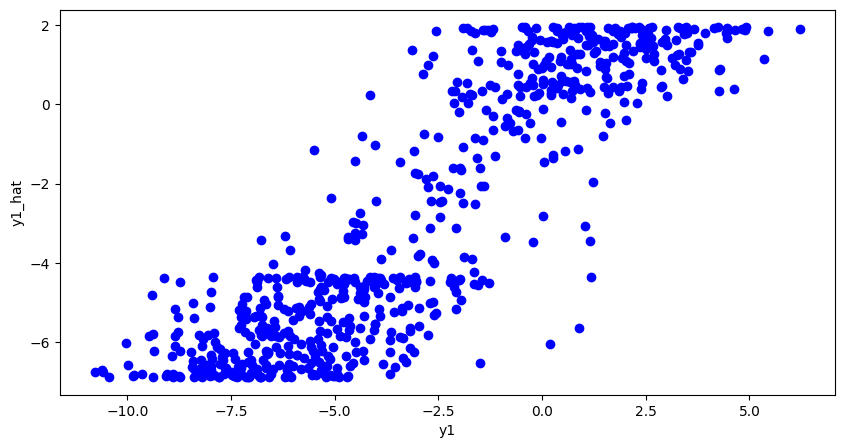

In [90]:
Y1_hat = np.dot(X_test, W.T)
Y1 = Y_test

print(Y1.shape, Y1_hat.shape)
correlation_coefficient = np.corrcoef(Y1_hat, Y1)
print(f"Pearson correlation coefficient for y1: ")
print(correlation_coefficient[0,1])
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.scatter(Y1, Y1_hat, c='blue', marker='o', label='Data Points', edgecolors=[0,0,0])
plt.xlabel("y1")
plt.ylabel("y1_hat")
plt.show()

In [91]:
loss = 0
for i in range(n_tst):
  loss += (np.dot(X_test[i], W)-Y_test[i])**2
MS_loss = (loss/(3*n_tst))
print("Root Mean Square Error = ", MS_loss)

Root Mean Square Error =  1.04391650562155
